In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

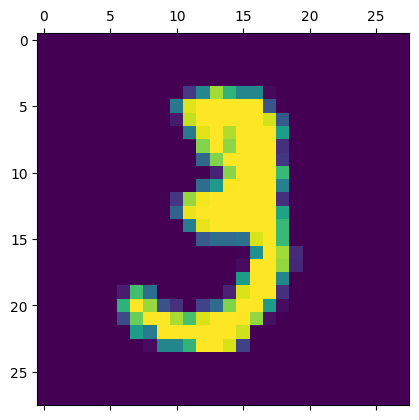

In [7]:
plt.matshow(X_train[10])

In [8]:
y_train[10]

np.uint8(3)

In [9]:
y_train[:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
#scale the dataset 0-1
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
#Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)  # (batch_size, height, width, channels)
X_test = X_test.reshape(-1, 28, 28, 1)

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
#Build CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),   #32 filters
    keras.layers.MaxPooling2D((2,2)),  #28*28 after pooling becomes 14*14
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)), #14*14 -> 7*7
    keras.layers.Flatten(),  #7×7×64 output into a 1D vector of size 7×7×64 = 3136.
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\User\Desktop\MLProjects\CNN\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#Compile modle
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
#Train model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9085 - loss: 0.2975
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9857 - loss: 0.0468 
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9904 - loss: 0.0290 
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9935 - loss: 0.0212 
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9953 - loss: 0.0136 


In [18]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0457


[0.037781596183776855, 0.9894000291824341]

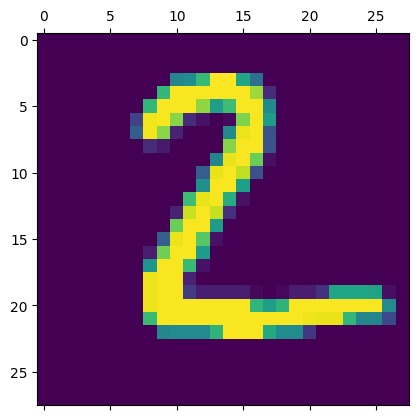

In [19]:
plt.matshow(X_test[1])

In [20]:
y_predicted = model.predict(X_test)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


array([5.2026106e-11, 1.4153144e-10, 1.0000000e+00, 6.3749085e-18,
       1.2806588e-13, 1.6214499e-18, 2.6429591e-11, 5.6154842e-13,
       9.3833827e-13, 1.3694155e-16], dtype=float32)

In [21]:
np.argmax(y_predicted[1])

np.int64(2)

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [23]:
#To evaluate the performance of the model
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    0,    0,    1,    1,    4,    1,    0],
       [   2, 1125,    0,    0,    0,    0,    1,    7,    0,    0],
       [   0,    0, 1015,    0,    0,    0,    0,   17,    0,    0],
       [   0,    0,    3, 1000,    0,    3,    0,    4,    0,    0],
       [   0,    0,    0,    0,  980,    0,    0,    0,    0,    2],
       [   1,    0,    1,    4,    0,  883,    1,    1,    0,    1],
       [   1,    2,    2,    0,    3,    6,  943,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1027,    1,    0],
       [   2,    0,    6,    1,    1,    0,    0,    2,  960,    2],
       [   0,    0,    0,    0,    9,    3,    0,    6,    2,  989]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

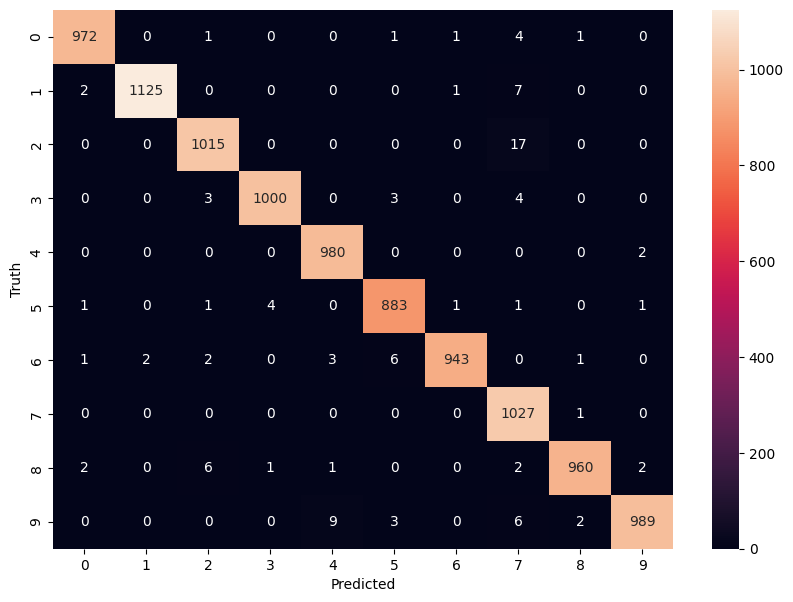

In [24]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
#Save model
model.save('digit_recognition_model.h5')

In [3]:
import cv2
import numpy as np
import tensorflow as tf

In [4]:
# Load trained model
model = tf.keras.models.load_model("digit_recognition_model.h5")

In [5]:
# Create a black canvas
canvas = np.zeros((400, 400), dtype="uint8")

In [9]:
#Variable to tack if the left mouse button is pressed
drawing = False

# Mouse event function
def draw(event, x, y, flags, param):

    global drawing
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        # Start drawing when the left button is presse
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing: # Draw only if the left button is held down
            cv2.circle(canvas, (x, y), 10, 255, -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False # Stop drawing when the left button is released
        

# Create OpenCV window
cv2.namedWindow("Draw a Digit")
cv2.setMouseCallback("Draw a Digit", draw)

while True:
    # Display the canvas
    cv2.imshow("Draw a Digit", canvas)

    # Press "P" to predict the digit
    key = cv2.waitKey(1) & 0xFF
    if key == ord("p"):
        # Resize canvas to 28x28 for MNIST model
        img = cv2.resize(canvas, (28, 28))
        img = img / 255.0  # Normalize
        img = img.reshape(1, 28, 28, 1)  # Reshape for CNN

        # Predict digit
        prediction = model.predict(img)
        digit = np.argmax(prediction)

        print(f"Predicted Digit: {digit}")

        # Reset canvas after prediction
        canvas = np.zeros((400, 400), dtype="uint8")

    # Press "Q" to quit
    elif key == ord("q"):
        break

cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Digit: 5
